In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from pathlib import Path
import os
import pandas as pd

while (Path.cwd() / "pyproject.toml").exists() is False:
    os.chdir("..")

In [2]:
external_folder = Path("data") / "raw" / "external"

la_file = "Local_Authority_Districts_May_2023_UK_BFC_V2_179125415192200502.gpkg"
old_westminster = "Westminster_Parliamentary_Constituencies_(Dec_2021)_UK_BFC.gpkg"
small_area = "uk-small-area-lsoa-soa-dz-apr-2021.gpkg"

la_data_loc = external_folder / la_file
parl_data_loc = external_folder / old_westminster
small_area_loc = external_folder / small_area

# convert from shapefile to parquet
for f in [la_data_loc, parl_data_loc, small_area_loc]:
    if f.exists() is False:
        print(f"{f} does not exist")
        continue
    print(f"Converting {f} to parquet")
    gdf = gpd.read_file(f)
    gdf.to_parquet(f.with_suffix(".parquet"), compression="GZIP")
    # print file size of resulting file
    print(
        f"Size of resulting file: {f.with_suffix('.parquet').stat().st_size / 1e6} MB"
    )

data/raw/external/Local_Authority_Districts_May_2023_UK_BFC_V2_179125415192200502.gpkg does not exist
data/raw/external/Westminster_Parliamentary_Constituencies_(Dec_2021)_UK_BFC.gpkg does not exist
data/raw/external/uk-small-area-lsoa-soa-dz-apr-2021.gpkg does not exist


In [3]:
from data_common.helpers.parquet import write_split_parquet, read_split_geoparquet

small_area_parquet_loc = small_area_loc.with_suffix(".parquet")

dir = Path("data", "raw", "external", "small_area_data")

write_split_parquet(small_area_parquet_loc, dir)

100%|██████████| 43/43 [00:55<00:00,  1.29s/it]


In [3]:
from data_common.helpers.parquet import write_split_parquet, read_split_geoparquet

small_dir = Path("data", "raw", "external", "small_area_data")

gdf = read_split_geoparquet(small_dir)
gdf.head()

,areacode,areaname,country,geometry
0,E01007193,Wirral 014A,E,"MULTIPOLYGON (((321231.768 388353.207, 321234...."
1,E01007194,Wirral 014B,E,"MULTIPOLYGON (((321814.000 389363.000, 321814...."
2,E01007195,Wirral 013A,E,"MULTIPOLYGON (((323068.956 389670.447, 323098...."
3,E01007196,Wirral 026A,E,"MULTIPOLYGON (((321300.000 387661.000, 321300...."
4,E01007197,Wirral 026B,E,"MULTIPOLYGON (((321564.000 387245.000, 321561...."


<Axes: >

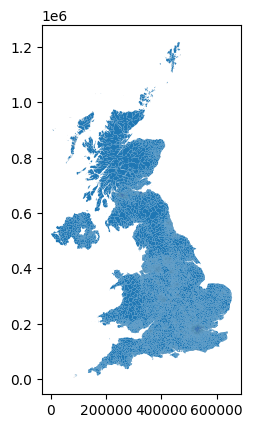

In [6]:
gdf.plot()